In [2]:
import cv2
import numpy as np

In [3]:
src=cv2.imread("lena.bmp",cv2.IMREAD_GRAYSCALE)

## get the histogram

In [4]:
rows,cols=src.shape
Lena13=np.zeros(shape=src.shape,dtype=src.dtype)
for i in range(rows):
    for j in range(cols):
        Lena13[i,j]=src[i,j]/3
cv2.imwrite("lena1Over3.png",Lena13)

True

In [5]:
histO=[0]*256
hist13=[0]*256
for i in range(rows):
    for j in range(cols):
        histO[(src[i,j])]+=1
        hist13[(Lena13[i,j])]+=1


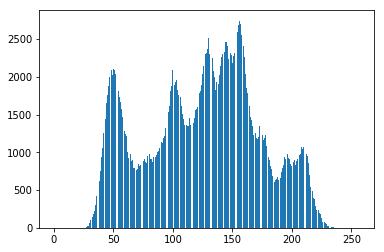

In [72]:
import matplotlib.pyplot as plt
plt.bar(range(1,257),histO)
plt.show()

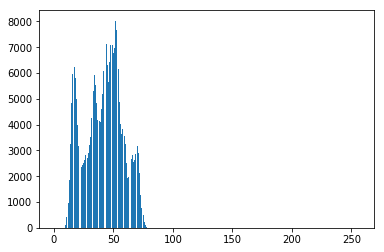

In [7]:
import matplotlib.pyplot as plt
plt.bar(range(1,257),hist13)
plt.show()

In [22]:
len(hist13)

256

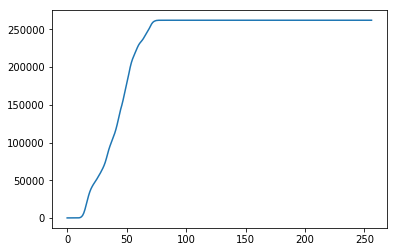

In [27]:
#plot the cdf
cdf=[0]*257
for i in range(len(hist13)):
    cdf[i+1]=hist13[i]+cdf[i]
    
plt.plot(cdf)

In [37]:
cdf=np.asarray(cdf)

In [73]:
#renormalize the cdf
nj=(cdf-cdf.min())*255
N=cdf.max()-cdf.min()
cdfNew=nj/N


In [67]:
cdfNew=cdfNew.astype("uint8")
lena13=cv2.imread("lena1Over3.png")
flat = lena13.flatten()
lenaEqual1D = cdfNew[flat]
#統計成histogram
histEq=[0]*256
for i in lenaEqual1D:
    histEq[lenaEqual1D[i]]+=1

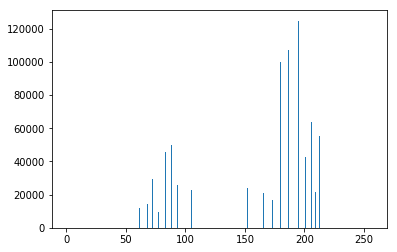

In [68]:
plt.bar(range(1,257),histEq)
plt.show()


In [69]:
lena13.shape

(512, 512, 3)

In [71]:
#trun 1D array into an image
#lenaEqual2D==np.zeros(shape=src.shape,dtype=src.dtype)
lenaEqual2D=np.reshape(lenaEqual1D, lena13.shape)
cv2.imwrite("lenaEqual.png",lenaEqual2D)

True